In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [94]:
import pandas as pd
from sklearn.datasets import make_blobs

data, pregenerated = make_blobs(1000,n_features=5,cluster_std=4)
result_df = pd.DataFrame(data)

0    334
2    333
1    333
dtype: int64

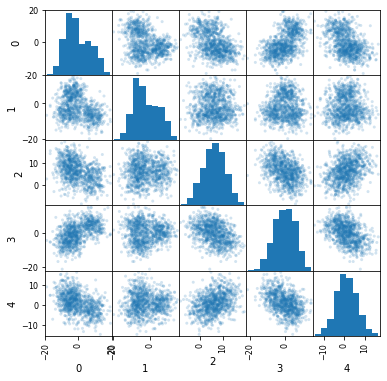

In [95]:
from pandas.plotting import scatter_matrix

scatter_matrix(result_df, alpha=0.2, figsize=(6, 6), )
pd.Series(pregenerated).value_counts()

In [96]:
result_df.columns = ["каталог","доставка","о нас","реклама","адреса"]
result_df["группа"] = pregenerated
result_df.head()

,каталог,доставка,о нас,реклама,адреса,группа
0,-6.749396,1.631326,5.930727,8.921318,4.369449,0
1,-3.236180,-2.021059,10.612313,-9.399113,11.396371,2
2,6.487262,-4.729539,4.344100,6.754867,-2.182741,1
3,-4.594507,1.749593,2.122296,-2.637794,6.668860,2
4,-3.002214,10.252213,6.296881,2.794991,7.447026,0


In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(data)




In [98]:
result_df["предсказанные"] = kmeans.labels_
print(result_df["предсказанные"].value_counts())
result_df.head()

0    341
1    333
2    326
Name: предсказанные, dtype: int64


,каталог,доставка,о нас,реклама,адреса,группа,предсказанные
0,-6.749396,1.631326,5.930727,8.921318,4.369449,0,0
1,-3.236180,-2.021059,10.612313,-9.399113,11.396371,2,2
2,6.487262,-4.729539,4.344100,6.754867,-2.182741,1,1
3,-4.594507,1.749593,2.122296,-2.637794,6.668860,2,0
4,-3.002214,10.252213,6.296881,2.794991,7.447026,0,0


In [99]:
temp = result_df["предсказанные"].map({2:0,0:1,1:2}) - result_df["группа"]
temp.value_counts(normalize=True)

 1    0.647
-2    0.314
-1    0.021
 0    0.013
 2    0.005
dtype: float64

In [100]:
tsne_data = (data - data.mean())/data.std()
tsne_df = TSNE(n_components=2,perplexity=20).fit_transform(tsne_data)
result_df["tsneX"] = tsne_df[:,0]
result_df["tsneY"] = tsne_df[:,1]

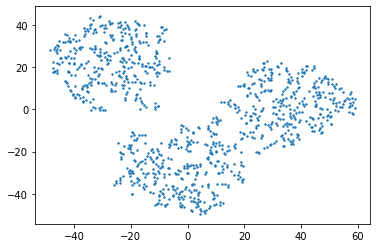

In [101]:
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=2,) 
plt.savefig("blobs_gray.jpg",dpi=1200,transparent=True)

In [102]:
result_df[(result_df['tsneX']>15) & (result_df['tsneY']<5)]["группа"].value_counts()

2    183
0     17
Name: группа, dtype: int64

In [103]:
def colorer(row,column):
    if row[column] == 1:
        return "Green"
    if row[column] == 2:
        return "Brown"    
    return "Magenta"

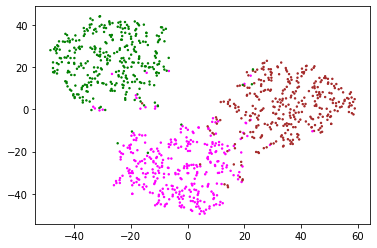

In [104]:
result_df["цвет"] = result_df.apply(colorer,axis = 1,column = "группа")
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=2,c=list(result_df['цвет'])) 
plt.savefig("blobs_colored.jpg",dpi=1200,transparent=True)

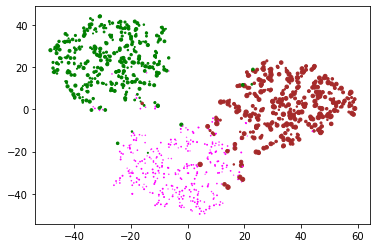

In [105]:
result_df["активность"] = np.random.randint(1,10, len(result_df))*(result_df["группа"]+0.1)
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=list(result_df['активность']),c=list(result_df['цвет'])) 
plt.savefig("blobs_size.jpg",dpi=1200,transparent=True)

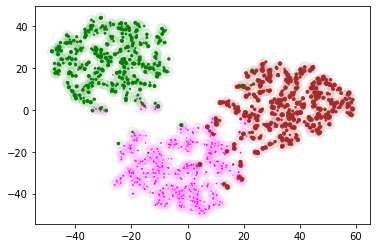

In [106]:
result_df["фон"] = result_df.apply(colorer,axis = 1,column = "предсказанные")
plt.scatter(result_df["tsneX"], result_df["tsneY"],s = 100, c=list(result_df['фон'])
                ,marker = "o",alpha = 0.05)
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=list(result_df['активность']),c=list(result_df['цвет'])) 
plt.savefig("blobs_background.jpg",dpi=1200,transparent=True)

pca example

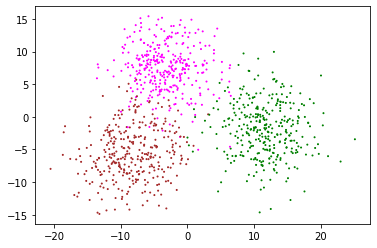

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
result_df['pcaX']  = principalComponents[:,0]
result_df['pcaY']  = principalComponents[:,1]
plt.scatter(result_df['pcaX'] , result_df['pcaY'],s = 1, c=list(result_df['цвет']),marker = "o",)
plt.show()

In [110]:
result_df.head(50)

,каталог,доставка,о нас,реклама,адреса,группа,предсказанные,tsneX,tsneY,цвет,активность,фон,pcaX,pcaY
0,-6.749396,1.631326,5.930727,8.921318,4.369449,0,0,-19.224482,-20.724611,Magenta,0.1,Magenta,-2.246188,6.308932
1,-3.236180,-2.021059,10.612313,-9.399113,11.396371,2,2,49.523777,12.708145,Brown,18.9,Brown,-10.965195,-5.977486
2,6.487262,-4.729539,4.344100,6.754867,-2.182741,1,1,-21.736357,15.955493,Green,1.1,Green,10.604656,0.392232
3,-4.594507,1.749593,2.122296,-2.637794,6.668860,2,0,16.281641,-26.095106,Brown,2.1,Magenta,-5.658955,2.393542
4,-3.002214,10.252213,6.296881,2.794991,7.447026,0,0,-12.307179,-39.668976,Magenta,0.8,Magenta,-5.557798,10.746829
5,-2.439759,-3.582680,17.636051,-2.244852,-0.533513,2,2,26.702871,0.406827,Brown,4.2,Brown,-4.795841,-3.519245
6,11.941103,-11.036994,6.498927,6.968679,-5.027121,1,1,-43.315701,24.534550,Green,1.1,Green,16.515972,-5.406392
7,-7.971053,-7.688975,10.765593,-5.662704,-2.147014,2,2,32.147488,-0.212546,Brown,2.1,Brown,-6.823774,-6.225461
8,6.250802,-2.017358,3.168975,6.874282,-4.564084,1,1,-21.347031,14.490749,Green,7.7,Green,10.979199,3.615810
9,3.806536,-0.816332,10.137551,-2.080899,9.212051,2,2,12.742342,3.639001,Brown,10.5,Brown,-1.893420,-2.504724
